In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/New_120dog breeds-299.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/projectDataset299')


with zipfile.ZipFile('/content/drive/MyDrive/New_120dog breeds-224.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/projectDataset224')

In [ ]:
import pathlib
from keras.preprocessing.image import ImageDataGenerator


data_dir1 = pathlib.Path('/content/projectDataset299/New_120dog breeds-299')

data_test1 = data_dir1 / 'test'


data_dir = pathlib.Path('/content/projectDataset224/New_120dog breeds-224')

data_test = data_dir / 'test'

In [ ]:
batch_size = 16
img_size = 224
img_size1 = 299

In [ ]:
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import applications
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=keras.applications.inception_v3.preprocess_input,
)


test_generator = test_datagen.flow_from_directory(
                        directory=data_test1,
                        shuffle=False,
                        class_mode='categorical',
                        color_mode='rgb',
                        target_size=(img_size1, img_size1))

y_true = test_generator.labels

Found 1200 images belonging to 120 classes.


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Ensemble_StackingVersion6.h5')

In [ ]:

def preprocess224VGG(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = tf.keras.applications.vgg16.preprocess_input(x)
    return x

def preprocess224Resnet(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = tf.keras.applications.resnet.preprocess_input(x)
    return x

def preprocess299(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(299, 299))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = tf.keras.applications.inception_v3.preprocess_input(x)
    return x

In [ ]:

import os
import glob

image_files = []
for subdir in sorted(os.listdir(data_test)):
    subdir_path = os.path.join(data_test, subdir)
    for file_path in sorted(glob.glob(os.path.join(subdir_path, '*.jpg'))):
        image_files.append(file_path)


In [ ]:
print(len(image_files))

1200


In [ ]:
print(image_files)

['/content/projectDataset224/New_120dog breeds-224/test/affenpinscher/00ca18751837cd6a22813f8e221f7819.jpg', '/content/projectDataset224/New_120dog breeds-224/test/affenpinscher/01268f0007876a692907bda89468184c.jpg', '/content/projectDataset224/New_120dog breeds-224/test/affenpinscher/0162107acd8f2588c0944b791d61bb0c.jpg', '/content/projectDataset224/New_120dog breeds-224/test/affenpinscher/040fef64640b89c53f161b6c5215b78b.jpg', '/content/projectDataset224/New_120dog breeds-224/test/affenpinscher/0484a6cc686a07e1edacd0fb44b1d965.jpg', '/content/projectDataset224/New_120dog breeds-224/test/affenpinscher/100f347ec78a42a9e7c2418e4beb3f6a.jpg', '/content/projectDataset224/New_120dog breeds-224/test/affenpinscher/106d7e0df869e7ba9f6d16c5f77ddfb8.jpg', '/content/projectDataset224/New_120dog breeds-224/test/affenpinscher/10edc6f98c2423e4e195e09a86b0d292.jpg', '/content/projectDataset224/New_120dog breeds-224/test/affenpinscher/11b60d8d86f14a601ca290909a17cbc6.jpg', '/content/projectDataset224

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

import itertools

In [ ]:
predicted_labels = []
# true_labels = []
for image_file in image_files:

    x = preprocess299(image_file)
    y = preprocess224VGG(image_file)
    z = preprocess224Resnet(image_file)

    x_ensemble = [np.array([z]), np.array([x])]
    y_pred = model.predict(x_ensemble)[0]

    predicted_label = np.argmax(y_pred)
    predicted_labels.append(predicted_label)

1/1 [==============================] - 0s 42ms/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

import itertools

In [ ]:
import numpy as np
count = np.count_nonzero(y_true != predicted_labels)
print(count)

118


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

accuracy = accuracy_score(y_true, predicted_labels)
f1_score = f1_score(y_true, predicted_labels, average='weighted')
recall = recall_score(y_true, predicted_labels, average='weighted')
precision = precision_score(y_true, predicted_labels, average='weighted')

print('Testing accuracy:', accuracy)
print('F1 score:', f1_score)
print('Recall:', recall)
print('Precision:', precision)


Testing accuracy: 0.9016666666666666
F1 score: 0.899812537929209
Recall: 0.9016666666666666
Precision: 0.9094357494357493


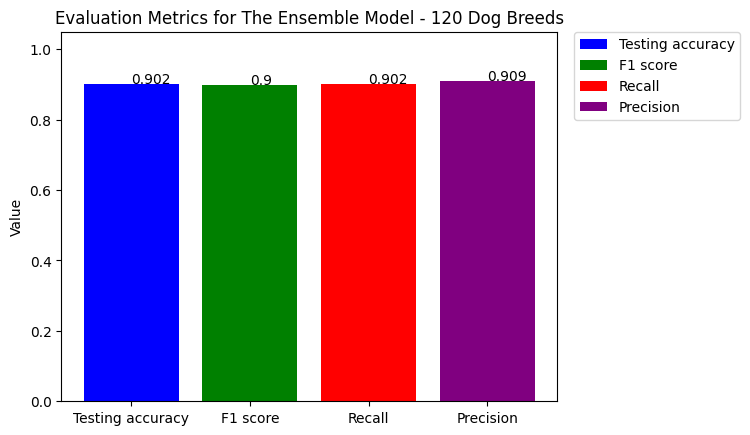

In [ ]:
# TestingACC, recall, f1-score, presicion
import matplotlib.pyplot as plt

plt.bar(['Testing accuracy', 'F1 score', 'Recall', 'Precision'], 
        [accuracy, f1_score, recall, precision], 
        color=['blue', 'green', 'red', 'purple'],
        label=['Testing accuracy', 'F1 score', 'Recall', 'Precision'])

plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.88))

for index, value in enumerate([accuracy, f1_score, recall, precision]):
    plt.text(index, value + 0.001, str(round(value, 3)))


plt.title('Evaluation Metrics for The Ensemble Model - 120 Dog Breeds')
plt.ylabel('Value')

plt.ylim([0, 1.05])

plt.show()

Text(0.5, 1.0, 'Confusion Matrix - 120 Dog Breeds In The Ensemble Model')

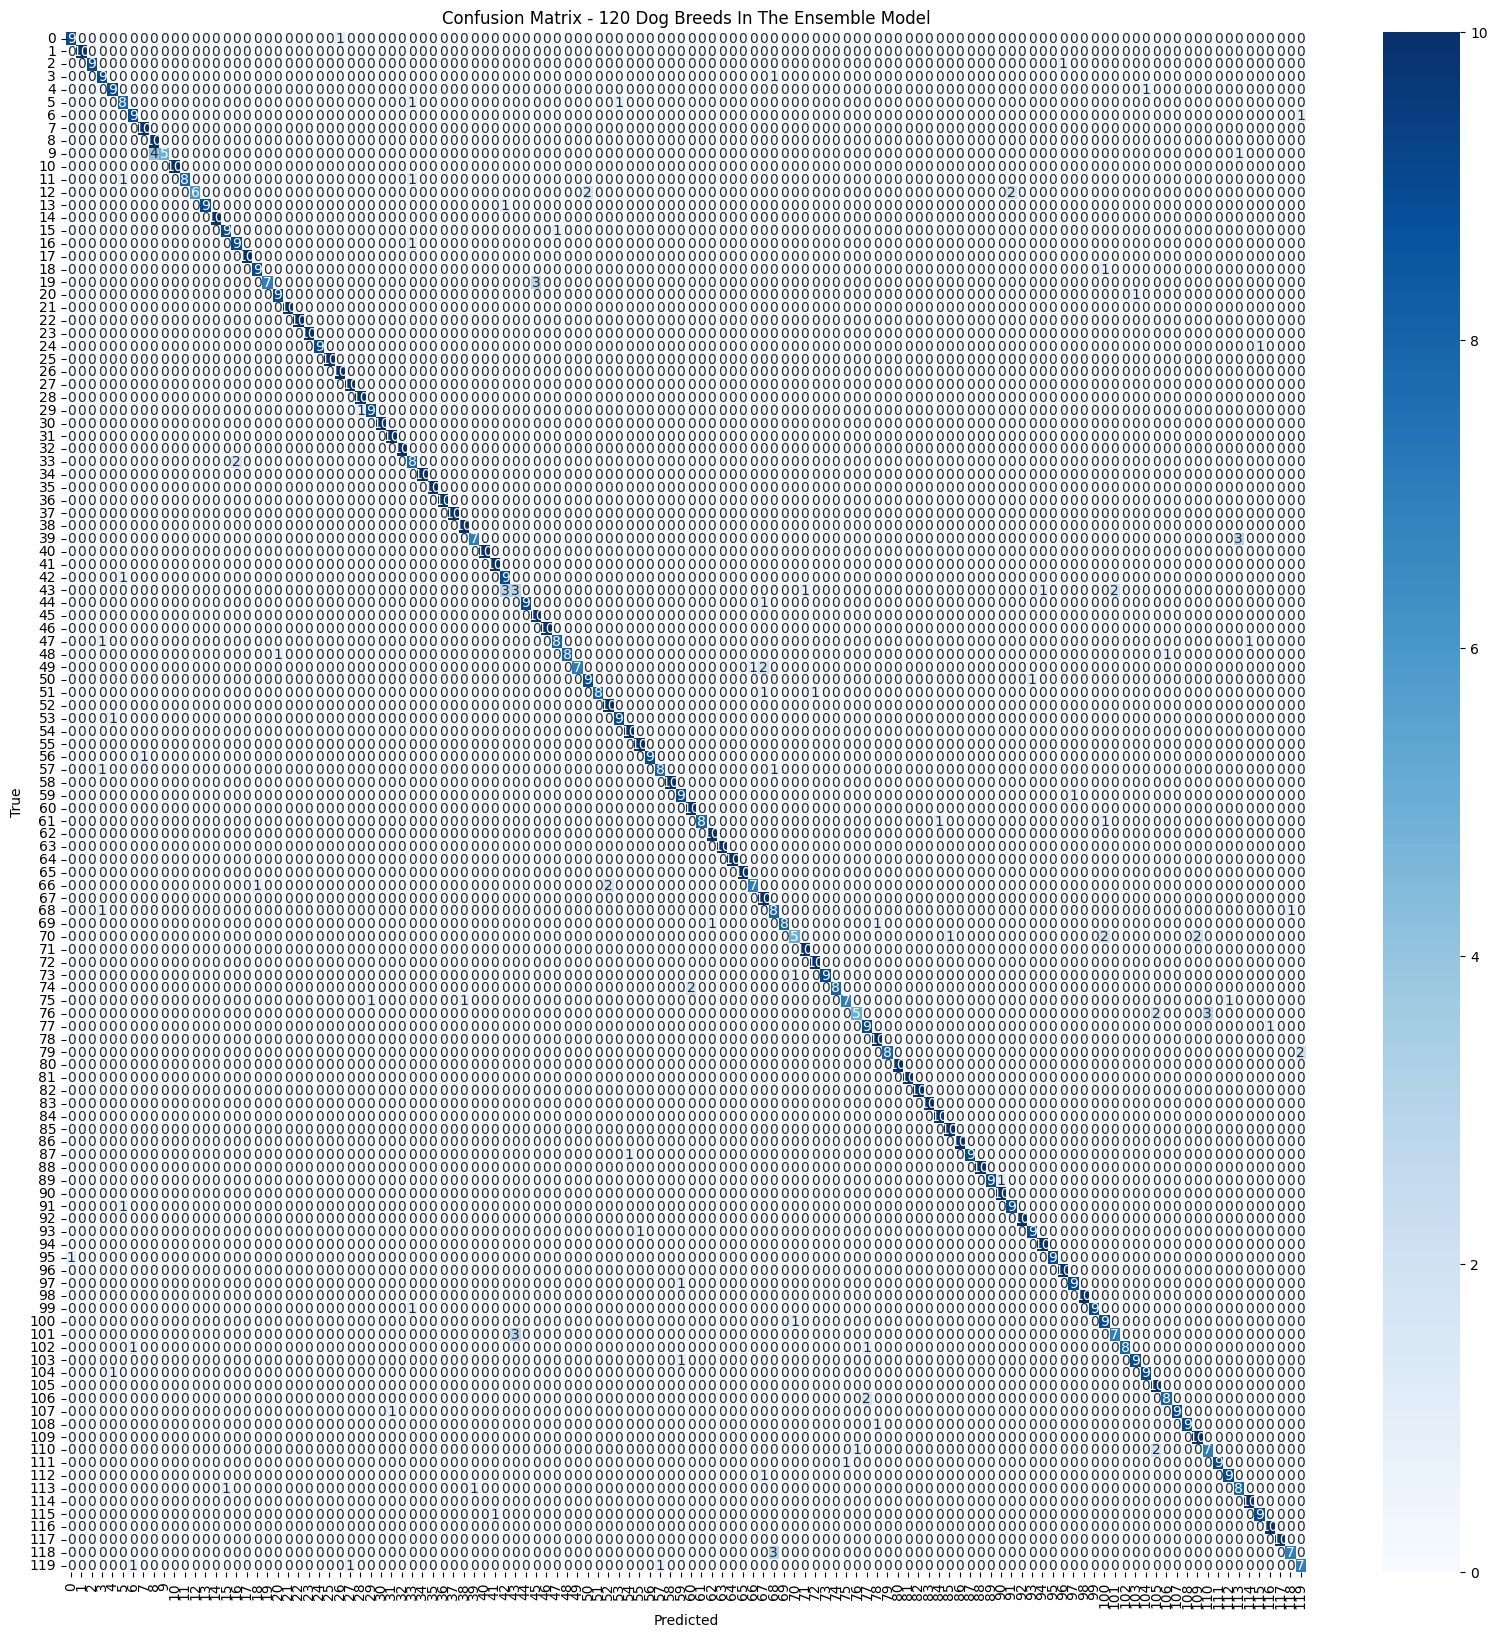

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(y_true, predicted_labels)

class_names = [str(i) for i in range(120)]

plt.figure(figsize=(20, 20))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix - 120 Dog Breeds In The Ensemble Model")

In [ ]:

from keras.utils import to_categorical
y_true = to_categorical(test_generator.labels)
y_pred_classes = to_categorical(predicted_labels)

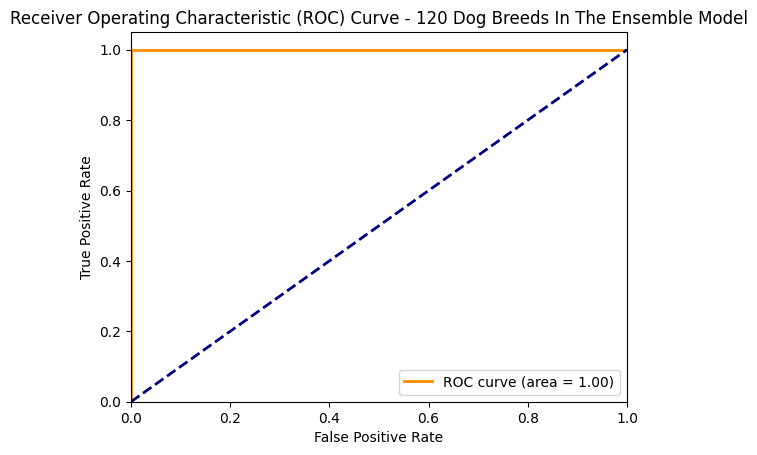

In [ ]:

fpr, tpr, thresholds = roc_curve(y_true[:, 1], y_pred_classes[:, 1])

roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - 120 Dog Breeds In The Ensemble Model')
plt.legend(loc="lower right")
plt.show()